**Hyperparameter tuning using Parfit library**

The following notebook shows the use of parfit library for hyperparameter tuning.

**Parfit:-**
https://github.com/jmcarpenter2/parfit

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['mushrooms.csv']


In [2]:
mushroom_df = pd.read_csv("../input/mushrooms.csv")

mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


**EDA**

In [3]:
mushroom_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
mushroom_df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

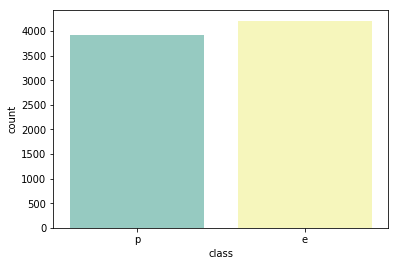

In [5]:
sns.countplot(x = mushroom_df['class'],palette='Set3')

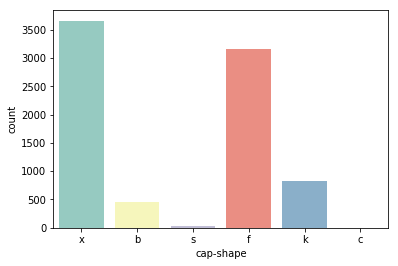

In [6]:
sns.countplot(x = mushroom_df['cap-shape'],palette='Set3')

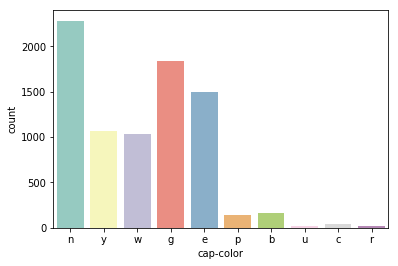

In [7]:
sns.countplot(x = mushroom_df['cap-color'],palette='Set3')

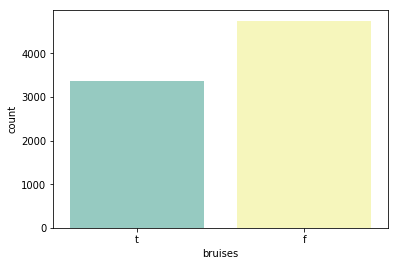

In [8]:
sns.countplot(x = mushroom_df['bruises'],palette='Set3')

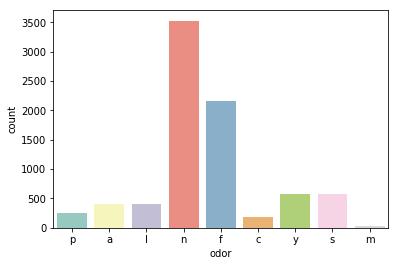

In [9]:
sns.countplot(x = mushroom_df['odor'],palette='Set3')

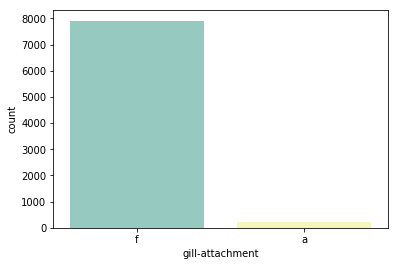

In [10]:
sns.countplot(x = mushroom_df['gill-attachment'],palette='Set3')

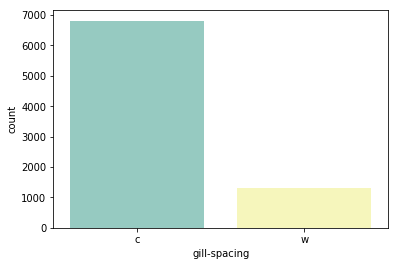

In [11]:
sns.countplot(x = mushroom_df['gill-spacing'],palette='Set3')

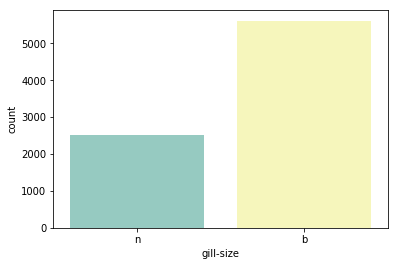

In [12]:
sns.countplot(x = mushroom_df['gill-size'],palette='Set3')

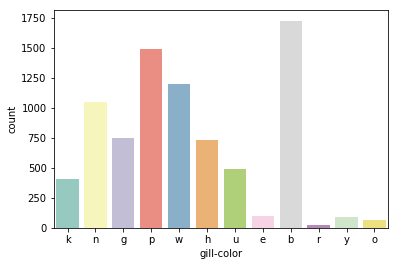

In [13]:
sns.countplot(x = mushroom_df['gill-color'],palette='Set3')

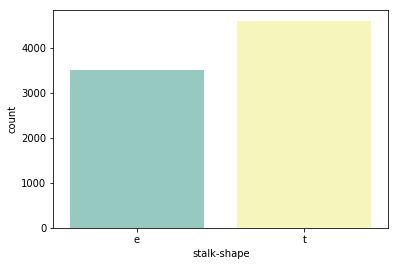

In [14]:
sns.countplot(x = mushroom_df['stalk-shape'],palette='Set3')

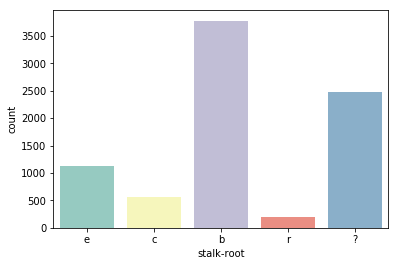

In [15]:
sns.countplot(x = mushroom_df['stalk-root'],palette='Set3')

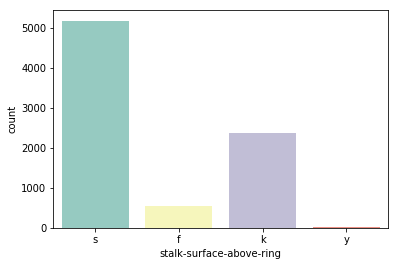

In [16]:
sns.countplot(x = mushroom_df['stalk-surface-above-ring'],palette='Set3')

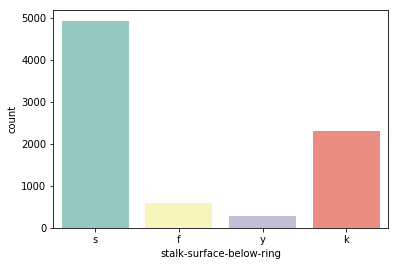

In [17]:
sns.countplot(x = mushroom_df['stalk-surface-below-ring'],palette='Set3')

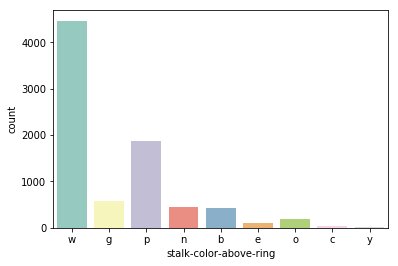

In [18]:
sns.countplot(x = mushroom_df['stalk-color-above-ring'],palette='Set3')

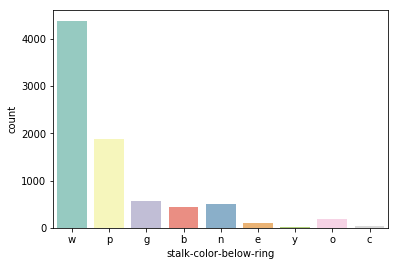

In [19]:
sns.countplot(x = mushroom_df['stalk-color-below-ring'],palette='Set3')

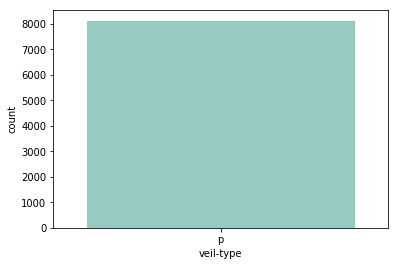

In [20]:
sns.countplot(x = mushroom_df['veil-type'],palette='Set3')

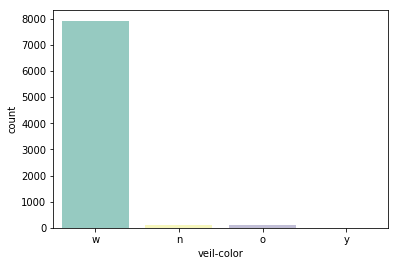

In [21]:
sns.countplot(x = mushroom_df['veil-color'],palette='Set3')

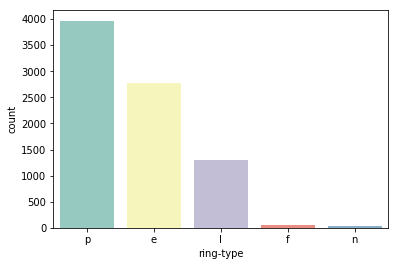

In [22]:
sns.countplot(x = mushroom_df['ring-type'],palette='Set3')

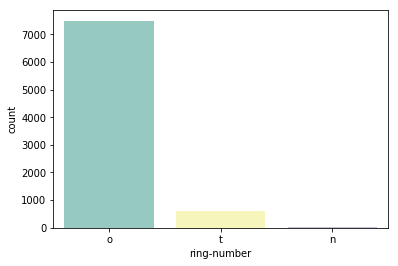

In [23]:
sns.countplot(x = mushroom_df['ring-number'],palette='Set3')

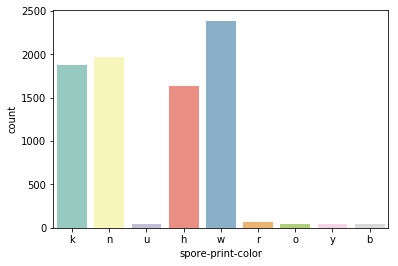

In [24]:
sns.countplot(x = mushroom_df['spore-print-color'],palette='Set3')

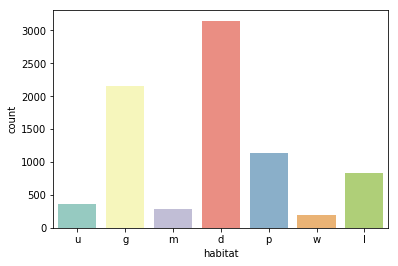

In [25]:
sns.countplot(x = mushroom_df['habitat'],palette='Set3')

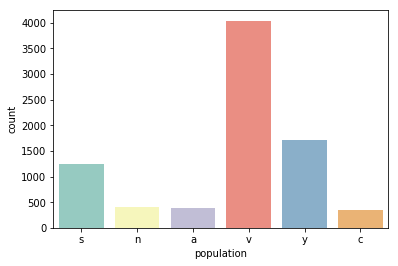

In [26]:
sns.countplot(x = mushroom_df['population'],palette='Set3')

**Label Encoding**

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
mushroom_df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [29]:
map_classes = {}
for col_name in mushroom_df.columns:
    le = LabelEncoder()
    mushroom_df[col_name] = le.fit_transform(mushroom_df[col_name])
    map_classes[col_name] =  le.classes_

In [30]:
mushroom_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [31]:
for col_name in mushroom_df.columns:
    print('classes for column "',col_name,'" are ',map_classes[col_name])

classes for column " class " are  ['e' 'p']
classes for column " cap-shape " are  ['b' 'c' 'f' 'k' 's' 'x']
classes for column " cap-surface " are  ['f' 'g' 's' 'y']
classes for column " cap-color " are  ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
classes for column " bruises " are  ['f' 't']
classes for column " odor " are  ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
classes for column " gill-attachment " are  ['a' 'f']
classes for column " gill-spacing " are  ['c' 'w']
classes for column " gill-size " are  ['b' 'n']
classes for column " gill-color " are  ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
classes for column " stalk-shape " are  ['e' 't']
classes for column " stalk-root " are  ['?' 'b' 'c' 'e' 'r']
classes for column " stalk-surface-above-ring " are  ['f' 'k' 's' 'y']
classes for column " stalk-surface-below-ring " are  ['f' 'k' 's' 'y']
classes for column " stalk-color-above-ring " are  ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
classes for column " stalk-color-below-ring " are  ['

In [32]:
Y = mushroom_df['class']

In [33]:
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [34]:
X = mushroom_df.drop(['class'],axis=1)

In [35]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


**Train Test Split**

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(5686, 22)
(5686,)
(2438, 22)
(2438,)


**Fitting Models and tuning hyperparameters using Parfit**

1. Logistic Regression Classifier

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0388s.) Setting batch_size=10.
[Parallel(n_jobs=-1)]: Done   5 out of  36 | elapsed:    0.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    0.3s finished


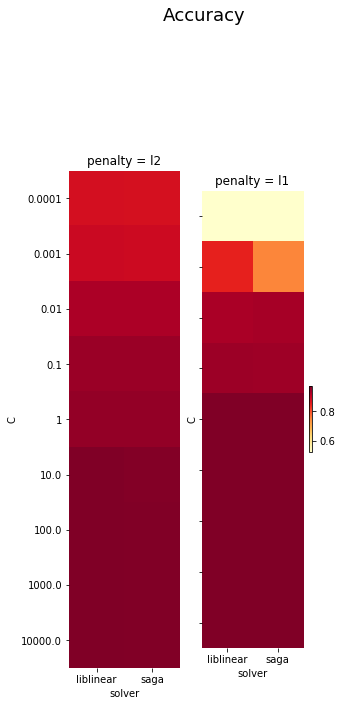

The best Model:-
LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
****************************************************************************************************
The Test Accuracy of the best Model:-
97.21 %


In [53]:
from sklearn.model_selection import ParameterGrid
import parfit.parfit as pf
from sklearn.metrics import accuracy_score

grid = {
    'solver': ['liblinear','saga'],
    'penalty': ['l2','l1'],
    'n_jobs': [-1],
    'C': [1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4]
}
paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores = pf.bestFit(LogisticRegression, paramGrid,
           X_train, Y_train, X_test, Y_test, 
           metric = accuracy_score, greater_is_better=True,
           scoreLabel = "Accuracy")

print("The best Model:-")
print(bestModel)
print("*"*100)
print("The Test Accuracy of the best Model:-")
print(round(bestScore*100,2),'%')

2. Linear SVM classifier

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    5.7s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:    5.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.1s finished


-------------SCORING MODELS-------------


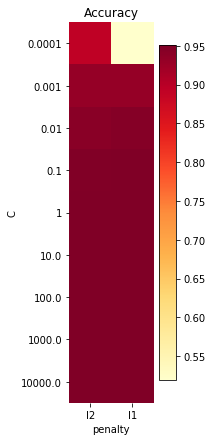

The best Model:-
LinearSVC(C=10.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
****************************************************************************************************
The Test Accuracy of the best Model:-
95.08 %


In [61]:
from sklearn.svm import LinearSVC

grid = {    
    'penalty': ['l2','l1'],    
    'C': [1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3,1e4],
    'dual': [False]    
}
paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores = pf.bestFit(LinearSVC, paramGrid,
           X_train, Y_train, X_test, Y_test, 
           metric = accuracy_score, greater_is_better=True,
           scoreLabel = "Accuracy")

print("The best Model:-")
print(bestModel)
print("*"*100)
print("The Test Accuracy of the best Model:-")
print(round(bestScore*100,2),'%')

3. Decision Tree Classifier

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0554s.) Setting batch_size=6.
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0552s.) Setting batch_size=42.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished


-------------SCORING MODELS-------------


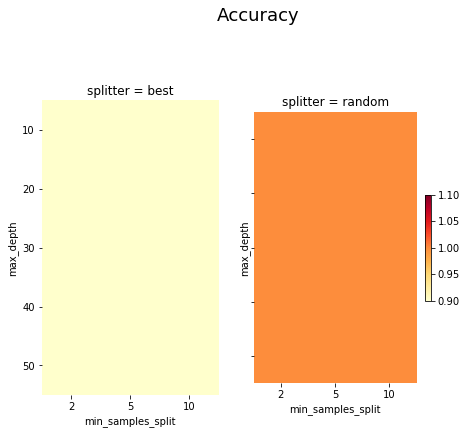

The best Model:-
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
****************************************************************************************************
The Test Accuracy of the best Model:-
100.0 %


In [62]:
from sklearn.tree import DecisionTreeClassifier

grid = {    
    'max_depth': [10,20,30,40,50],    
    'splitter': ['best','random'],
    'min_samples_split': [2,5,10]    
}
paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores = pf.bestFit(DecisionTreeClassifier, paramGrid,
           X_train, Y_train, X_test, Y_test, 
           metric = accuracy_score, greater_is_better=True,
           scoreLabel = "Accuracy")

print("The best Model:-")
print(bestModel)
print("*"*100)
print("The Test Accuracy of the best Model:-")
print(round(bestScore*100,2),'%')

**Feature Importance**

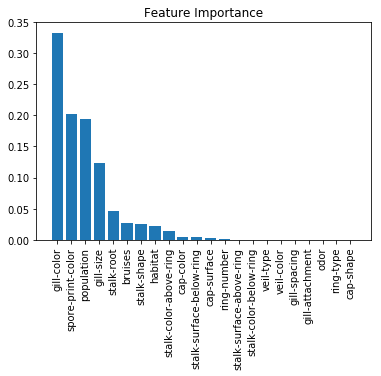

In [81]:
import matplotlib.pyplot as plt

indices = np.argsort(bestModel.feature_importances_)[::-1]
names = [X.columns[i] for i in indices]

plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), bestModel.feature_importances_[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

**The best Model was the decision tree classifier which gave 100 % accuracy on the test data.<br/> 
However, since we did not use a validation set, we have probably overfit to this particular Test set.<br/>
This notebook is meant to be an introduction to Parfit library which is capable of receiving a particular validation set as opposed to GridSearchCV which uses Cross validation.  **